# Prediction of Early-Stage Melanoma Recurrence Using Clinical and Histopathologic Features

## Classifcation tasks

Guihong Wan, July/27/2022     
Massachusetts General Hospital, Harvard Medical School

In [2]:
run 'header.py'

In [3]:
run 'Utils.py'

# Data preprocessing

In [19]:
# 30 artifitial samples
melanoma_data = pd.read_csv("data/melanoma_example_v1.0.csv")

In [20]:
print(melanoma_data.shape)
print(melanoma_data.groupby(['Site'])['Recurrence'].value_counts(), "\n")

(30, 133)
Site  Recurrence
DFCI  0             10
      1              5
MGB   0             10
      1              5
Name: Recurrence, dtype: int64 



In [21]:
print(melanoma_data.shape)

(30, 133)


In [22]:
melanoma_data = melanoma_data.drop(columns = ['MelanomaID', 'Dia2Recur']+nomi_features)
melanoma_data.tail()

,Recurrence,Site,TrdxAgeAtDx,medianincome,CCItotal_psuedoMedian,cmhistory,fthickness,fAnatomicLevel,fMitoses,totalmargins,...,CAID_binary_Unavailable,CAID_binary_Yes,SAID_binary_No,SAID_binary_Unavailable,SAID_binary_Yes,newNODE_0.0,newNODE_1.0,newNODE_2.0,newNODE_3.0,newNODE_4.0
25,1,MGB,87,82.416,4,0,5.0,6,4,2.0,...,1,0,0,1,0,0,0,1,0,0
26,1,MGB,86,82.416,4,0,5.0,4,14,2.0,...,1,0,0,1,0,0,0,1,0,0
27,1,MGB,69,126.081,2,1,20.0,5,14,2.0,...,1,0,0,1,0,0,0,0,0,1
28,1,MGB,32,126.081,0,0,1.9,4,14,2.0,...,0,0,1,0,0,0,0,0,0,1
29,1,MGB,70,126.081,2,0,3.0,4,14,2.0,...,1,0,0,1,0,0,0,0,0,1


## Feature Importance

In [26]:
melanoma_data_cut = melanoma_data

In [27]:
data_MGH = melanoma_data_cut[melanoma_data_cut['Site'] == "MGB"]
data_DFCI = melanoma_data_cut[melanoma_data_cut['Site'] == "DFCI"]
data_ALL = melanoma_data_cut

data_MGH = data_MGH.drop(columns = ['Site'])
data_DFCI = data_DFCI.drop(columns = ['Site'])
data_ALL = data_ALL.drop(columns = ['Site'])

In [29]:
print(data_MGH.columns.values, len(data_MGH.columns.values))

['Recurrence' 'TrdxAgeAtDx' 'medianincome' 'CCItotal_psuedoMedian'
 'cmhistory' 'fthickness' 'fAnatomicLevel' 'fMitoses' 'totalmargins'
 'GenderNm_Male' 'Race_White' 'Ethnicity_Hispanic'
 'Ethnicity_Non.Hispanic' 'Ethnicity_Unknown' 'InsuranceType_Medicaid'
 'InsuranceType_Medicare' 'InsuranceType_Private' 'InsuranceType_Self.Pay'
 'MaritalStatus_Divorced' 'MaritalStatus_Married' 'MaritalStatus_Other'
 'MaritalStatus_Single' 'MaritalStatus_Unavailable'
 'MaritalStatus_Widowed' 'fstage_1A' 'fstage_1B' 'fstage_2A' 'fstage_2B'
 'fstage_2C' 'TrdxSiteDesc_SKIN.OF.FACE'
 'TrdxSiteDesc_SKIN.OF.LOWER.LIMB.AND.HIP'
 'TrdxSiteDesc_SKIN.OF.SCALP.AND.NECK' 'TrdxSiteDesc_SKIN.OF.TRUNK'
 'TrdxSiteDesc_SKIN.OF.UPPER.LIMB.AND.SHOULDER' 'Laterality_Left'
 'Laterality_Midline' 'Laterality_Right'
 'TrdxHistologyDesc_LENTIGO.MALIGNA.MELANOMA'
 'TrdxHistologyDesc_MELANOMA..NOS' 'TrdxHistologyDesc_NODULAR.MELANOMA'
 'TrdxHistologyDesc_SUPERFICIAL.SPREADING.MELANOMA' 'fUlceration_Absent'
 'fUlceration_Presen

In [30]:
n_repeats = 50
TOP = 20

# feature_names = data_MGH.columns.values

feature_names = ['Age at diagnosis', 'Median income',
       'CCS', 'HPCM: Yes', 
                 'Thickness', 
                 'Anatomic level',
       'Mitotic rate', 'Total margins', 'Sex: Male', 'Race: White',
       'Ethnicity: Hispanic', 'Ethnicity: Non-Hispanic', 'Ethnicity: Unknown',
       'Insurance type: Medicaid', 'Insurance type: Medicare',
       'Insurance type: Private', 'Insurance type: Self.pay',
       'Marital status: Divorced', 'Marital status: Married',
       'Marital status: Other', 'Marital status: Single',
       'Marital status: Unavailable', 'Marital status: Widowed', 
       'Stage: 1A', 'Stage: 1B', 'Stage: 2A', 'Stage: 2B', 'Stage: 2C',
       'Site: Face', 'Site: Lower.limb.and.hip',
       'Site: Scalp.and.neck', 'Site: Trunk', 'Site: Upper.limb.and.shoulder', 
       'Laterality: Left', 'Laterality: Midline', 'Laterality: Right',
       'Type: Lentigo.maligna',
       'Type: Melanoma.NOS', 'Type: Nodular',
       'Type: Superficial.spreading',
       'Ulceration: Absent', 'Ulceration: Present', 'Ulceration: Unavailable',
       'Precursor lesion: Present',
       'Precursor type: Absent',
       'Precursor type: Benign.nevus',
       'Precursor type: Dermal.nevus',
       'Precursor type: Dysplastic.nevus',
       'Precursor type: Lentigo.maligna',
        'Precursor type: Unknown.type',
        'Radial growth: Absent', 'Radial growth: Present','Radial growth: Unavailable',
        'Vertical growth: Absent',
        'Vertical growth: Present', 'Vertical growth: Unknown',
 'VGT: Absent',
 'VGT: Epithelioid',
 'VGT: Epithelioid.and.nevoid',
 'VGT: Epithelioid.and.small.cell',
 'VGT: Epithelioid.and.spindled',
 'VGT: Other', 'VGT: Small.cell',
 'VGT: Spindled', 'VGT: Unavailable',
 'VGT: Unknown.type',
 'Microsatellites: Absent',
 'Regression: Present',
 'TIL: Absent',
 'TIL: Present',
 'TIL: Unavailable',
 'TIL type: Absent',
 'TIL type: Brisk',
 'TIL type: Non.Brisk',
 'TIL type: Unknown',
 'TIL type: Unknown.type',      
       'Lymphovascular invasion: Present', 
        'Perineural invasion: Present',
       'Margin check: No', 'Margin check: Yes', 'Margin check: Unknown', 
       'HNMSC: No', 'HNMSC: Unavailable', 'HNMSC: Yes', 
       'HSBN: No',
       'HSBN: Unavailable', 
       'HSBN: Yes',
       'HOM: No', 'HOM: Unavailable', 'HOM: Yes',
       'HCAID: No', 'HCAID: Unavailable', 'HCAID: Yes', 
       'HSAID: No', 'HSAID: Unavailable', 'HSAID: Yes', 
       'RLNH: Not indicated', 'RLNH: Unknown reasean', 'RLNH: Age/Comorbidity',
       'RLNH: Deferred', 'RLNH: Negative'
]

    
feature_names = np.array(feature_names)
# print(feature_names.tolist())
print(len(feature_names.tolist()))

101


In [32]:
ALL = True
MGH = False
DFCI = False

assert sum([ALL, MGH, DFCI]) == 1

nFold = 5
tuning_scoring = "roc_auc"


X_all = data_ALL.drop(columns = ['Recurrence'])
y_all = data_ALL['Recurrence']

X_mgh = data_MGH.drop(columns = ['Recurrence'])
y_mgh = data_MGH['Recurrence']

X_dfci = data_DFCI.drop(columns = ['Recurrence'])
y_dfci = data_DFCI['Recurrence']


X_all, y_all = RandomUnderSampler().fit_resample(X_all, y_all)
X_mgh, y_mgh = RandomUnderSampler().fit_resample(X_mgh, y_mgh)
X_dfci, y_dfci = RandomUnderSampler().fit_resample(X_dfci, y_dfci)

X_all = StandardScaler().fit_transform(X_all)
X_mgh = StandardScaler().fit_transform(X_mgh)
X_dfci = StandardScaler().fit_transform(X_dfci)

print(y_all.value_counts())
print(y_mgh.value_counts())
print(y_dfci.value_counts())


if ALL:
    X, y = X_all, y_all
if DFCI:
    X, y = X_dfci, y_dfci
if MGH:
    X, y = X_mgh, y_mgh

0    10
1    10
Name: Recurrence, dtype: int64
0    5
1    5
Name: Recurrence, dtype: int64
0    5
1    5
Name: Recurrence, dtype: int64


In [45]:
param_grid = {'learning_rate':[0.01,0.02,0.025, 0.03, 0.035, 0.04, 0.045, 0.05],
                 'min_samples_leaf':[1,2,3],
                 'max_depth':[1],
                 'n_estimators':[100, 120]}

CLF = GradientBoostingClassifier(validation_fraction=0.0001)
cv = RepeatedStratifiedKFold(n_splits=nFold, n_repeats=1)
gsearchgb = GridSearchCV(estimator = CLF, 
                       param_grid = param_grid, 
                       scoring=tuning_scoring, 
                       cv=cv)
gsearchgb.fit(X, y)
print(gsearchgb.best_params_, gsearchgb.best_score_)

{'learning_rate': 0.02, 'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 120} 0.875


In [46]:
model = GradientBoostingClassifier(n_estimators=gsearchgb.best_params_['n_estimators'],
                                       validation_fraction = 0.0001, # meaningless
                                       learning_rate=gsearchgb.best_params_['learning_rate'],
                                       min_samples_leaf=gsearchgb.best_params_['min_samples_leaf'],
                                       max_depth=gsearchgb.best_params_['max_depth'],
                                      )


model.fit(X, y)
result_GB = permutation_importance(model, X, y, 
                                   scoring = 'roc_auc',
                                   n_repeats=n_repeats)
perm_sorted_idx_GB = result_GB.importances_mean.argsort()


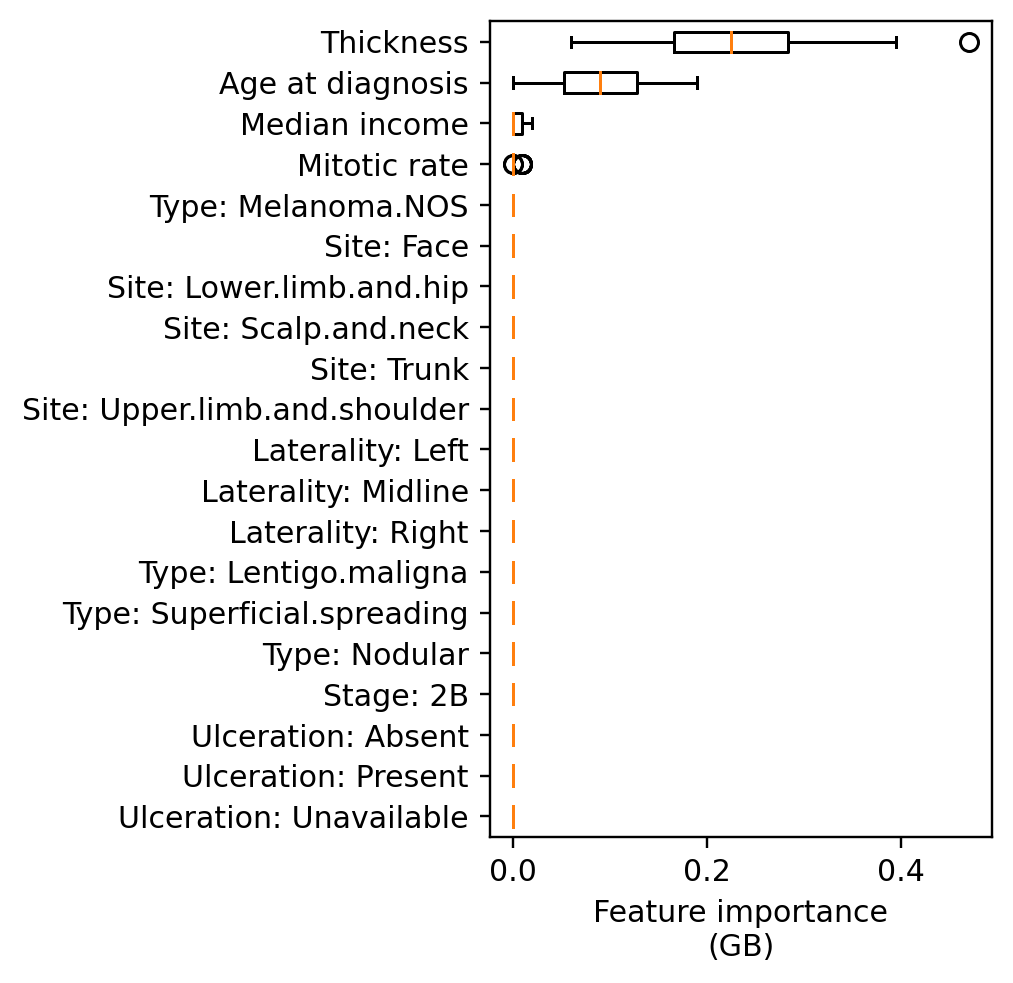

In [47]:
result = result_GB.importances[perm_sorted_idx_GB].T[:,-TOP:]
labels=(feature_names[perm_sorted_idx_GB])[-TOP:]

fig, ax = plt.subplots(figsize=(3,5),dpi=216)

plt.boxplot(
    result,
    vert=False,
    labels=labels,
)
if DFCI:
    plt.xlabel("Feature importance - DFCI\n(GB)")
elif MGH:
    plt.xlabel("Feature importance - MGB\n(GB)")
else:
    plt.xlabel("Feature importance\n(GB)")


In [48]:
param_grid = {'C':[0.001, 0.002, 0.003,0.004, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03,
                   0.035, 0.04, 0.05, 0.1,0.2,0.3],
                 'penalty':['l2']}
CLF = LogisticRegression(solver= 'liblinear')
cv = RepeatedStratifiedKFold(n_splits=nFold, n_repeats=1)
gsearchLR = GridSearchCV(estimator = CLF, 
                            param_grid = param_grid, 
                            scoring=tuning_scoring , 
                       cv=cv)
gsearchLR.fit(X,y)
print(gsearchLR.best_params_, gsearchLR.best_score_)

{'C': 0.001, 'penalty': 'l2'} 0.75


In [49]:
model = LogisticRegression(solver= 'liblinear',
                               penalty= gsearchLR.best_params_['penalty'], 
                               C=gsearchLR.best_params_['C'] )
    
model.fit(X,y)
result_LR = permutation_importance(model, X, y, 
                                   scoring = 'roc_auc',
                                   n_repeats=n_repeats)
perm_sorted_idx_LR = result_LR.importances_mean.argsort()

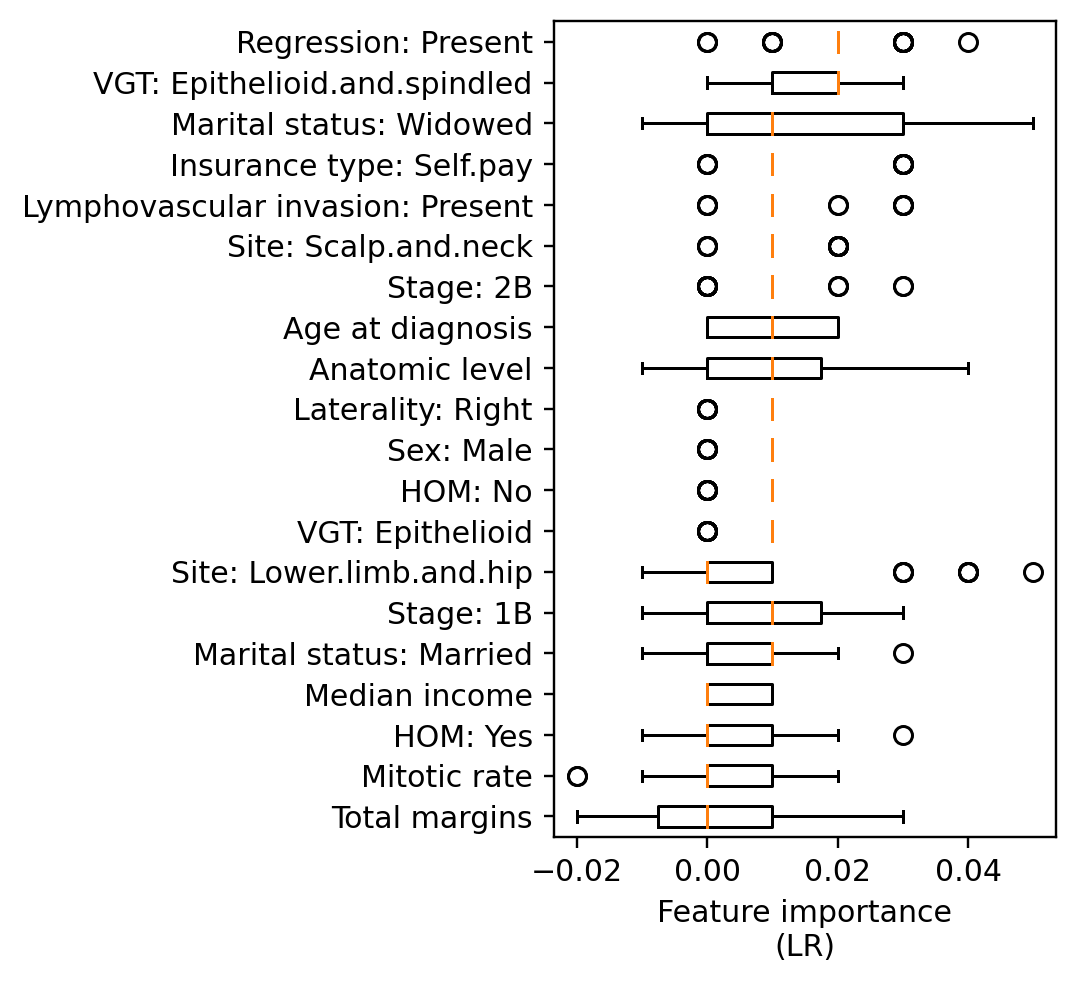

In [39]:
result = result_LR.importances[perm_sorted_idx_LR].T[:,-TOP:]
labels=(feature_names[perm_sorted_idx_LR])[-TOP:]

fig, ax = plt.subplots(figsize=(3,5),dpi=216)

plt.boxplot(
    result,
    vert=False,
    labels=labels,
)
if DFCI:
    plt.xlabel("Feature importance - DFCI\n(LR)")
if MGH:
    plt.xlabel("Feature importance - MGB\n(LR)")
if ALL:
    plt.xlabel("Feature importance\n(LR)")

In [52]:
if True:

    param_grid = {'min_samples_split':range(5,16),
                  'n_estimators':range(50,91, 10)}
    CLF = RandomForestClassifier()
    cv = RepeatedStratifiedKFold(n_splits=nFold, n_repeats=1, random_state=42)
    gsearch = GridSearchCV(estimator = CLF,
                           param_grid = param_grid, 
                           scoring=tuning_scoring, 
                           cv=cv)
    gsearch.fit(X,y)
    print(gsearch.best_params_,gsearch.best_score_)

{'min_samples_split': 7, 'n_estimators': 50} 0.95


In [53]:
model = RandomForestClassifier(n_estimators = gsearch.best_params_['n_estimators'],
                               min_samples_split = gsearch.best_params_['min_samples_split'])

model.fit(X,y)
result_RF = permutation_importance(model, X,y, 
                                   scoring = 'roc_auc',
                                   n_repeats=n_repeats)
perm_sorted_idx_RF = result_RF.importances_mean.argsort()

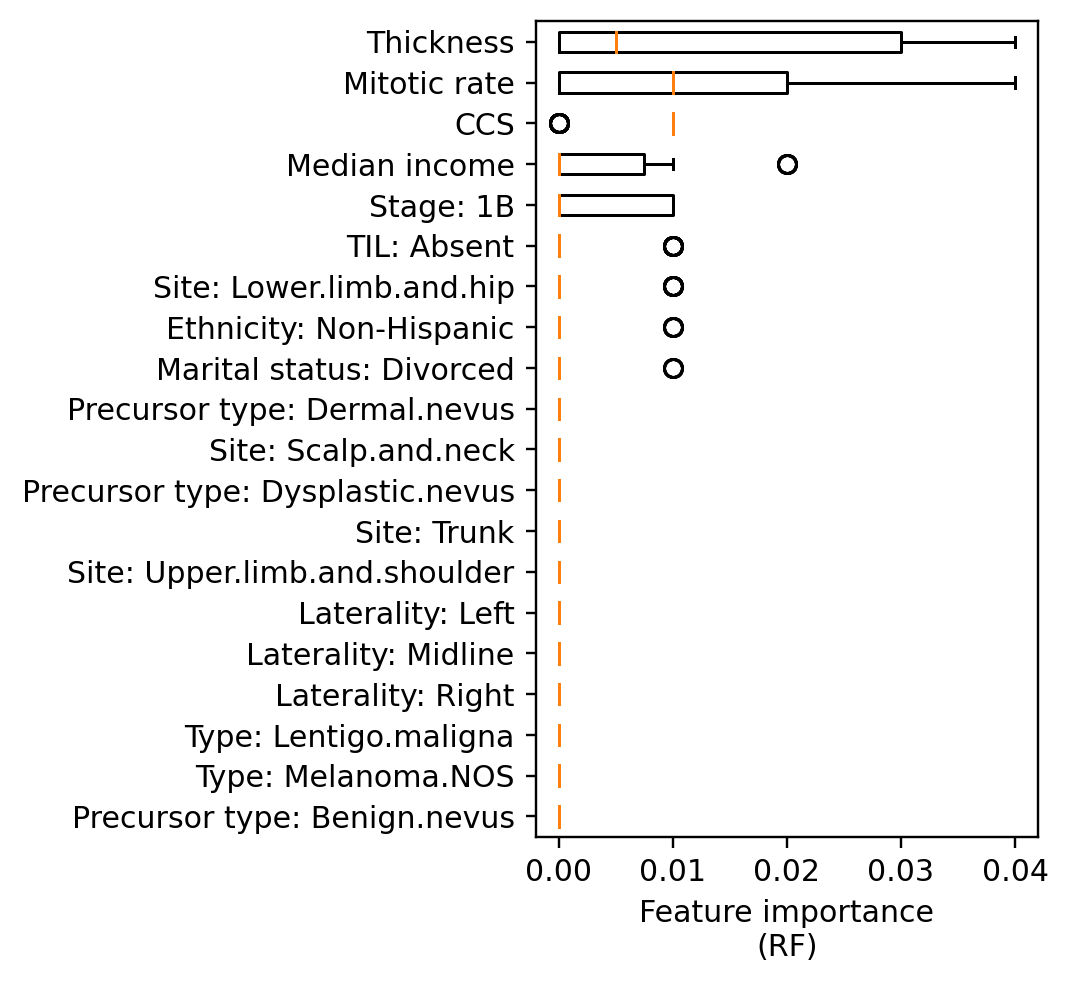

In [54]:
result = result_RF.importances[perm_sorted_idx_RF].T[:,-TOP:]
labels=(feature_names[perm_sorted_idx_RF])[-TOP:]

fig, ax = plt.subplots(figsize=(3,5),dpi=216)

plt.boxplot(
    result,
    vert=False,
    labels=labels,
)
if DFCI:
    plt.xlabel("Feature importance - DFCI\n(RF)")
if MGH:
    plt.xlabel("Feature importance - MGB\n(RF)")
if ALL:
    plt.xlabel("Feature importance\n(RF)")

In [55]:
param_grid = {'C':[1, 1.5, 2,2.5]}
CLF = SVC(kernel='rbf',probability=True)
cv = RepeatedStratifiedKFold(n_splits=nFold, n_repeats=1, random_state=42)
gsearch = GridSearchCV(estimator = CLF, 
                            param_grid = param_grid, 
                            scoring=tuning_scoring , cv=cv)
gsearch.fit(X, y)
print(gsearch.best_params_,gsearch.best_score_)

{'C': 1} 0.65


In [56]:
model = SVC(kernel='rbf',probability=True,
               C = gsearch.best_params_['C']
               )
    
model.fit(X, y)
result_SVM = permutation_importance(model, X, y, 
                                   scoring = 'roc_auc',
                                   n_repeats=n_repeats)
perm_sorted_idx_SVM = result_SVM.importances_mean.argsort()

Text(0.5, 0, 'Feature importance\n(SVM)')

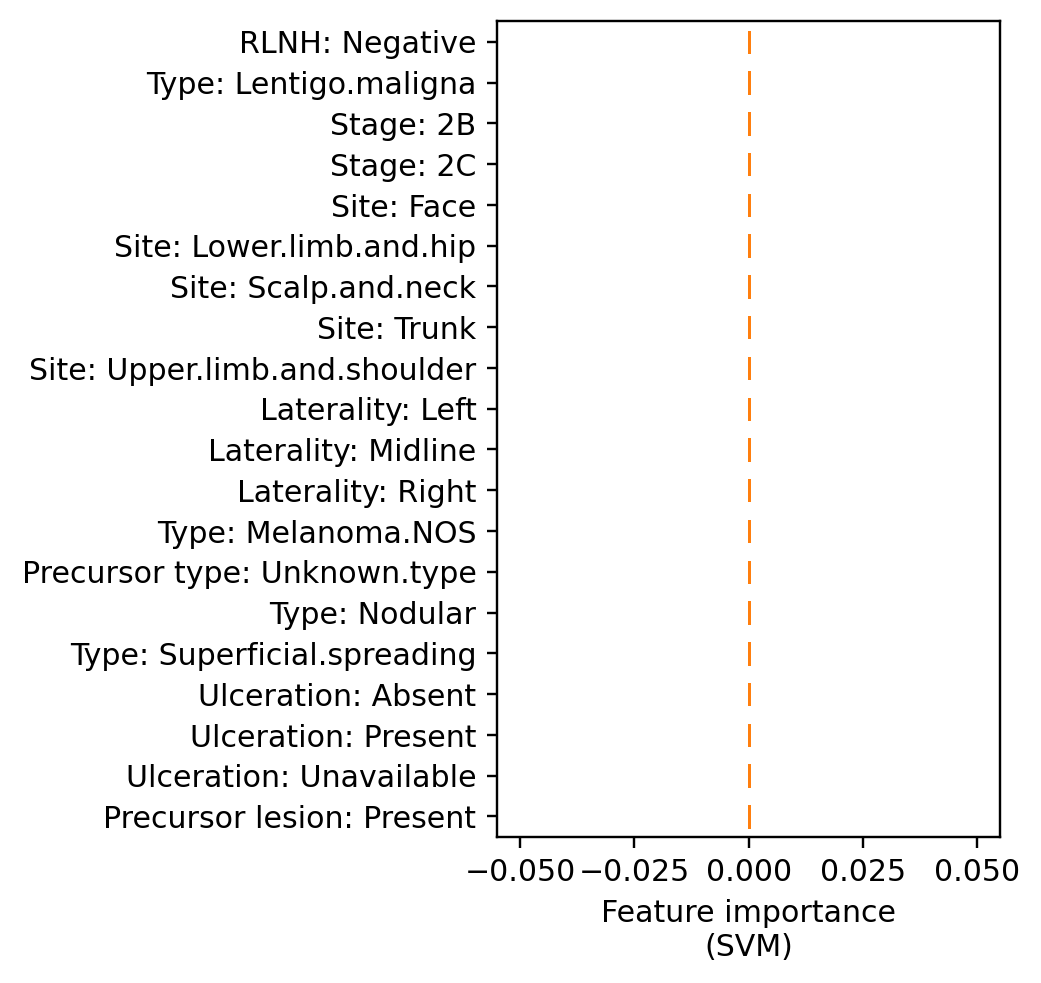

In [57]:
result = result_SVM.importances[perm_sorted_idx_SVM].T[:,-TOP:]
labels=(feature_names[perm_sorted_idx_SVM])[-TOP:]

fig, ax = plt.subplots(figsize=(3,5),dpi=216)

plt.boxplot(
    result,
    vert=False,
    labels=labels,
)
plt.xlabel("Feature importance\n(SVM)")

In [58]:
if True:
    param_test1 = {'alpha':[0.5,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,2],
                  'activation':['logistic']}

    CLF = MLPClassifier(max_iter=100)
    
    gsearch1 = GridSearchCV(estimator = CLF, 
                            param_grid = param_test1, 
                            scoring='roc_auc' , cv=5) 
    gsearch1.fit(X_mgh,y_mgh)
    print(gsearch1.best_params_, gsearch1.best_score_)

{'activation': 'logistic', 'alpha': 1.1} 0.6


In [59]:
model = MLPClassifier(max_iter=100, 
                      activation = 'logistic', 
                      alpha =gsearch1.best_params_['alpha'])

model.fit(X_mgh, y_mgh)
result_MLP = permutation_importance(model, X_mgh, y_mgh, 
                                   scoring = 'roc_auc',
                                   n_repeats=n_repeats)
perm_sorted_idx_MLP = result_MLP.importances_mean.argsort()

Text(0.5, 0, 'Feature importance - DFCI\n(MLP)')

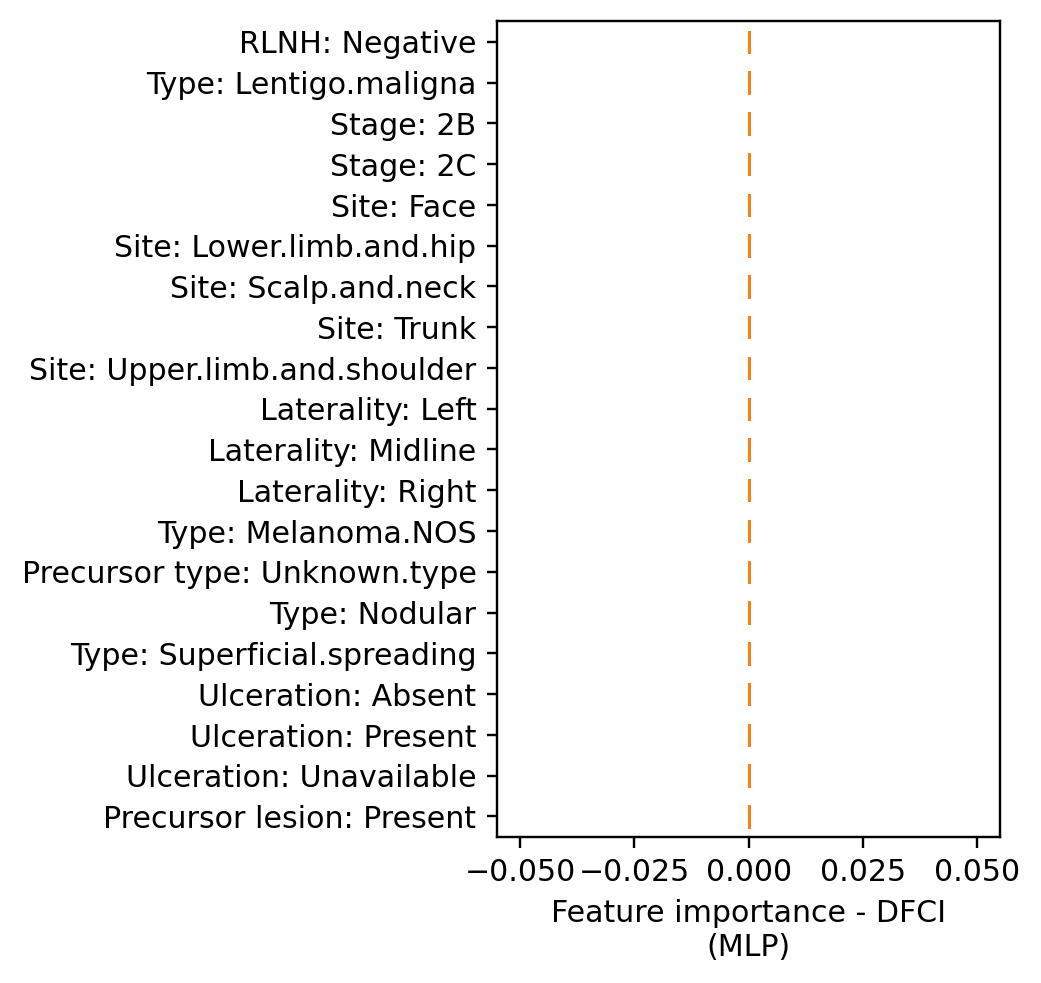

In [60]:
result = result_MLP.importances[perm_sorted_idx_MLP].T[:,-TOP:]
labels=(feature_names[perm_sorted_idx_MLP])[-TOP:]

fig, ax = plt.subplots(figsize=(3,5),dpi=216)

plt.boxplot(
    result,
    vert=False,
    labels=labels,
)
plt.xlabel("Feature importance - DFCI\n(MLP)")
